In [5]:
import pickle
from collections import defaultdict, Counter
from itertools import permutations

from statsmodels.iolib.summary2 import summary_col

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import statsmodels.api as sm

In [2]:
params = {
    "font.family": 'serif',
    "font.serif": ["Computer Modern"],
    'text.usetex': True,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.labelsize': 14

   }
plt.rcParams.update(params)

# Static Runs

In [7]:
with open("data_out/ex_1.3.pickle", "rb") as f:
    rl_table, cb_table, seed_table = pickle.load(f)

In [8]:
rl_table_full = rl_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
rl_table = rl_table[rl_table.Step>=50]

rl_outcomes = pd.get_dummies(rl_table.Outcome)

rl_predictors = pd.get_dummies(rl_table.SPE)
rl_predictors["Const."] = 1

rl_regressors = [col for col in rl_predictors.columns if col != "StatusQuo"]

rl_logits = {}
for col in rl_outcomes.columns:
    rl_logits[col] = sm.Logit(rl_outcomes[col], rl_predictors[rl_regressors]).fit()

Optimization terminated successfully.
         Current function value: 0.042617
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.288090
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.587512
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.429611
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.077086
         Iterations 10


In [10]:
cb_table_full = cb_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
cb_table = cb_table[cb_table.Step>=50]

cb_outcomes = pd.get_dummies(cb_table.Outcome)

cb_predictors = pd.get_dummies(cb_table.SPE)
cb_predictors["Const."] = 1

cb_regressors = [col for col in cb_predictors.columns if col != "StatusQuo"]

cb_logits = {}
for col in cb_outcomes.columns:
    cb_logits[col] = sm.Logit(cb_outcomes[col], cb_predictors[cb_regressors]).fit()

Optimization terminated successfully.
         Current function value: 0.072064
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.224245
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.619948
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.549387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.064474
         Iterations 12


In [13]:
rl_logits.keys()

dict_keys(['War1', 'StatusQuo', 'Capitulate2', 'War2', 'Capitulate1'])

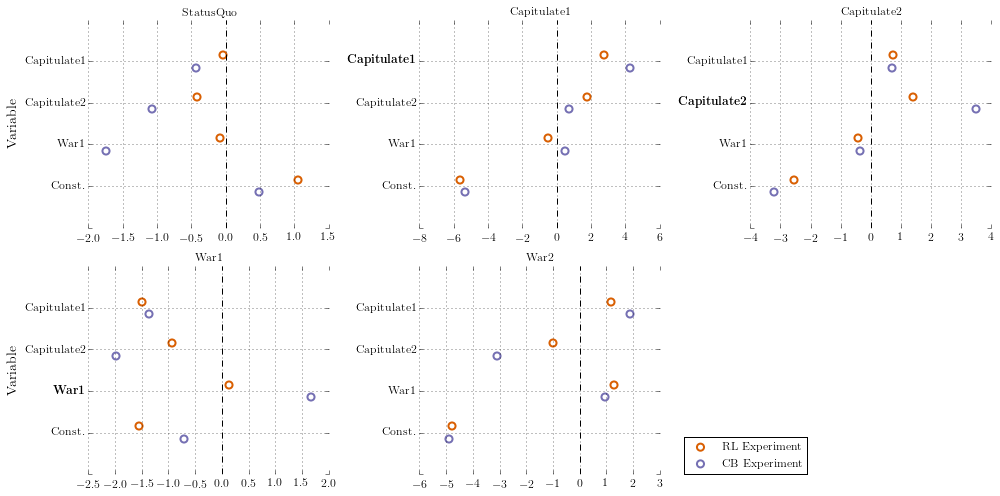

In [21]:
fig = plt.figure(figsize=(14,7))

colors = ['#d95f02', '#7570b3']
offsets = [0.15, -0.15]

model_names = ["RL Experiment", "CB Experiment"]
ax_count = 1
for outcome_name in ["StatusQuo", "Capitulate1", "Capitulate2", "War1", "War2"]:
    ax = fig.add_subplot(2, 3, ax_count)
    artists = {}

    for j, m in enumerate([rl_logits, cb_logits]):
        model = m[outcome_name]
        max_val = len(model.params)
        labels = ["" for i in range(max_val + 1)]
        
        for i, v in enumerate(model.params.index):
            y =  max_val - i
            labels[y] = v
            if v == outcome_name:
                labels[y] = "$\mathbf{" + v +  "}$"
            y = y + offsets[j]
            c = colors[j]
            x_min, x_max = model.conf_int().ix[v]
            ax.hlines(y, x_min, x_max, lw=2, color=c, zorder=1)
            a = ax.scatter(model.params[v], y, c='w', edgecolors=c, lw=2, s=50, zorder=2)
            artists[model_names[j]] = a

    ax.vlines(0, 0, max_val+1, linestyle='--')
    ax.set_ylim(0, max_val+1)
    ax.set_yticks(range(max_val+1))
    ax.set_yticklabels(labels)
    if ax_count in [1, 4]:
        ax.set_ylabel("Variable")
    ax_count += 1
    #ax.set_xlabel("Coefficient confidence intervals")
    ax.set_title(outcome_name)

    ax.grid(True)
    for spine in ["top", "left", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

# Legend
legend_labels = model_names
handles = [artists[m] for m in model_names]
ax.legend(handles, legend_labels, scatterpoints=1, loc=(1.1, 0))

fig.tight_layout()

In [23]:
fig.savefig("/Users/dmasad/Documents/Dissertation/Dissertation/WarReason/Figures/SC1_Coeffs.pdf")

# Dynamic Runs

In [24]:
with open("data_out/ex_2.5.pickle", "rb") as f:
    rl_table, cb_table, seed_table = pickle.load(f)

In [25]:
rl_table_full = rl_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
rl_table = rl_table[rl_table.Step>=50]

rl_outcomes = pd.get_dummies(rl_table.Outcome)

rl_predictors = pd.get_dummies(rl_table.SPE)
rl_predictors["Const."] = 1

rl_regressors = [col for col in rl_predictors.columns if col != "StatusQuo"]

rl_logits = {}
for col in rl_outcomes.columns:
    rl_logits[col] = sm.Logit(rl_outcomes[col], rl_predictors[rl_regressors]).fit()

Optimization terminated successfully.
         Current function value: 0.021777
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.095354
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.282118
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204943
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.030345
         Iterations 12


In [26]:
cb_table_full = cb_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
cb_table = cb_table[cb_table.Step>=50]

cb_outcomes = pd.get_dummies(cb_table.Outcome)

cb_predictors = pd.get_dummies(cb_table.SPE)
cb_predictors["Const."] = 1

cb_regressors = [col for col in cb_predictors.columns if col != "StatusQuo"]

cb_logits = {}
for col in cb_outcomes.columns:
    cb_logits[col] = sm.Logit(cb_outcomes[col], cb_predictors[cb_regressors]).fit()

Optimization terminated successfully.
         Current function value: 0.184888
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.336184
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.673840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627655
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.207829
         Iterations 8


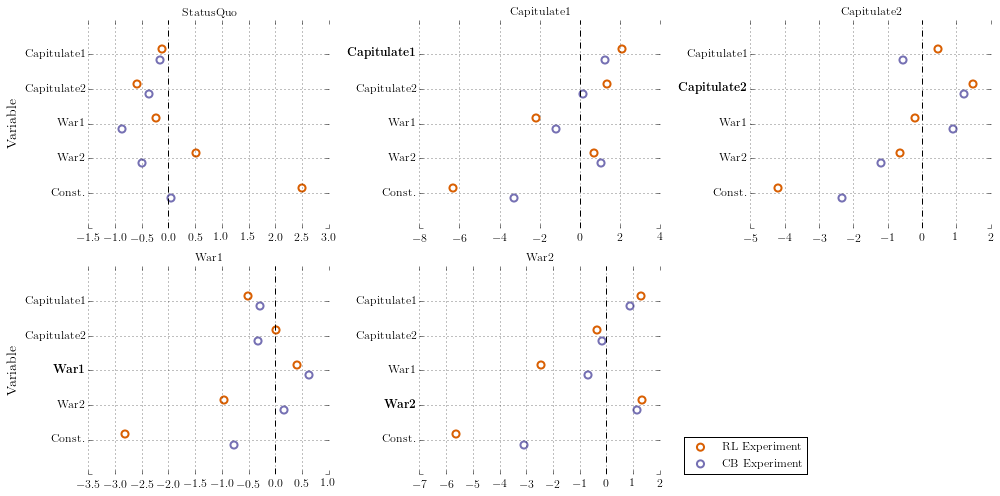

In [27]:
fig = plt.figure(figsize=(14,7))

colors = ['#d95f02', '#7570b3']
offsets = [0.15, -0.15]

model_names = ["RL Experiment", "CB Experiment"]
ax_count = 1
for outcome_name in ["StatusQuo", "Capitulate1", "Capitulate2", "War1", "War2"]:
    ax = fig.add_subplot(2, 3, ax_count)
    artists = {}

    for j, m in enumerate([rl_logits, cb_logits]):
        model = m[outcome_name]
        max_val = len(model.params)
        labels = ["" for i in range(max_val + 1)]
        
        for i, v in enumerate(model.params.index):
            y =  max_val - i
            labels[y] = v
            if v == outcome_name:
                labels[y] = "$\mathbf{" + v +  "}$"
            y = y + offsets[j]
            c = colors[j]
            x_min, x_max = model.conf_int().ix[v]
            ax.hlines(y, x_min, x_max, lw=2, color=c, zorder=1)
            a = ax.scatter(model.params[v], y, c='w', edgecolors=c, lw=2, s=50, zorder=2)
            artists[model_names[j]] = a

    ax.vlines(0, 0, max_val+1, linestyle='--')
    ax.set_ylim(0, max_val+1)
    ax.set_yticks(range(max_val+1))
    ax.set_yticklabels(labels)
    if ax_count in [1, 4]:
        ax.set_ylabel("Variable")
    ax_count += 1
    #ax.set_xlabel("Coefficient confidence intervals")
    ax.set_title(outcome_name)

    ax.grid(True)
    for spine in ["top", "left", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

# Legend
legend_labels = model_names
handles = [artists[m] for m in model_names]
ax.legend(handles, legend_labels, scatterpoints=1, loc=(1.1, 0))

fig.tight_layout()

In [28]:
fig.savefig("/Users/dmasad/Documents/Dissertation/Dissertation/WarReason/Figures/SC2_Coeffs.pdf")